## 1. Problem Statement

###  *How can we leverage AI-driven solutions to accurately forecast resale flat prices in Singapore's public housing market, incorportating the impact of nearby amenities to address the need for precision amidst market fluctuations?*

## 2. Data Acquisition 

The main source of data, which is our base data was obtained from "https://beta.data.gov.sg/" and Kaggle. The open source government website is Singapore's open data collective that allows users to explore national datasets, download raw data for research analysis and access web APIs for web development.

We obtained our primary dataset from Kaggle labelled as "Singapore Public Housing Resale Flat Prices, which contains 155,822 rows of HDB flats transactions from Year 2017 to 2023. However, the information provided in this dataset were insufficient as only flat data such as its size, model and location was shown. 

Therefore, we decided to use additional datasets as seen below, in the form of csv files to aid us in predicting accurately for this project. 
 
* HDB Property Information - Contains information on resale flat prices and also has features like 'Maximum floor level'.

* Government Hawker Centres - Contains information about hawker centres, shows accessibility to afforable food.

* MRT Stations - Contains information on MRT stations, shows accessibility to transport.

* Primary Schools - Contains information on Primary schools, measure of accessibility to early education depending on proximity to primary school. 

* Shopping Malls - Contains information on Shopping malls, shows accessbility to leisure. 

### 2.1 Data Pre-Processing

#### Distance for amenities have been retrieved using OneMap SG API. They are under Processed Notebooks
#### Amenities include; MRT, Shopping Mall, Schools and Hawker Centres
#### The final data was derived from merging all the processed datasets

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
# load final dataset
df_final = pd.read_csv('final_merged_dataset.csv')

# # remove 'Index' column
# if 'Index' in df_final.columns:
#     df_final.drop(columns=['Index'], inplace=True)


# print data types of variables
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155821 entries, 0 to 155820
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     155821 non-null  int64  
 1   Town                      155821 non-null  object 
 2   FlatType                  155821 non-null  object 
 3   Block                     155821 non-null  object 
 4   Street                    155821 non-null  object 
 5   StoreyRange               155821 non-null  object 
 6   FloorAreaSqm              155821 non-null  float64
 7   FlatModel                 155821 non-null  object 
 8   LeaseCommenceDate         155821 non-null  int64  
 9   RemainingLease            155821 non-null  object 
 10  Price                     155821 non-null  float64
 11  Year                      155821 non-null  int64  
 12  Month                     155821 non-null  int64  
 13  Address                   155821 non-null  o

In [3]:
# peek top 3
df_final.head(3)

,Index,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,...,MRTDistribution,NearestHawkerCentre,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution
0,0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,More than-1km,Blk 409 Ang Mo Kio Ave 10,0.17241064129214373 km,within-1km,Townsville Primary School,0.2181254395256675 km,within-1km,AMK Hub,1.003018118556015 km,More than-1km
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,More than-1km,Blk 724 Ang Mo Kio Ave 6,0.9341909181314921 km,within-1km,Ang Mo Kio Primary School,0.2415753425097763 km,within-1km,Broadway Plaza,0.868861431290418 km,within-1km
2,2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,More than-1km,Sembawang Hill Food Centre,1.166164248332101 km,More than-1km,Anderson Primary School,0.7771571662417865 km,within-1km,Broadway Plaza,1.5255730377820635 km,More than-1km


In [4]:
# peek bottom 3 
df_final.tail(3)

,Index,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,...,MRTDistribution,NearestHawkerCentre,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution
155818,155818,YISHUN,5 ROOM,613,YISHUN ST 61,01 TO 03,121.0,Improved,1987,62 years 11 months,...,within-1km,Chong Pang Market & Food Centre,1.4653787639732154 km,More than-1km,Naval Base Primary School,0.5705025243695171 km,within-1km,Wisteria Mall,0.7096434843832458 km,within-1km
155819,155819,YISHUN,EXECUTIVE,791,YISHUN AVE 2,04 TO 06,143.0,Apartment,1987,63 years 04 months,...,within-1km,Chong Pang Market & Food Centre,1.3315649621256602 km,More than-1km,Peiying Primary School,0.5047072189538684 km,within-1km,Wisteria Mall,0.907007619831424 km,within-1km
155820,155820,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,64 years 03 months,...,More than-1km,Chong Pang Market & Food Centre,2.001295123950408 km,More than-1km,Huamin Primary School,0.22821915587425576 km,within-1km,Wisteria Mall,0.931337724752111 km,within-1km


In [5]:
# check for null values
print(df_final.isnull().sum())

Index                         0
Town                          0
FlatType                      0
Block                         0
Street                        0
StoreyRange                   0
FloorAreaSqm                  0
FlatModel                     0
LeaseCommenceDate             0
RemainingLease                0
Price                         0
Year                          0
Month                         0
Address                       0
Latitude                    329
Longitude                   329
Postal                      329
MaxFloorLevel                 0
YearCompleted                 0
MarketHawker                  0
MultistoreyCarpark            0
TotalDwellingUnits            0
RemainingLeaseINT             0
StoreyRangeINT                0
NearestMRT                  329
DistanceFromMRT             329
MRTDistribution             329
NearestHawkerCentre         329
DistanceFromHawkerCentre    329
HawkerCentreDistribution    329
NearestSchool               329
Distance

In [6]:
# deal with missing values by dropping those values
df_final.dropna(inplace=True)
print(df_final.isnull().sum())

Index                       0
Town                        0
FlatType                    0
Block                       0
Street                      0
StoreyRange                 0
FloorAreaSqm                0
FlatModel                   0
LeaseCommenceDate           0
RemainingLease              0
Price                       0
Year                        0
Month                       0
Address                     0
Latitude                    0
Longitude                   0
Postal                      0
MaxFloorLevel               0
YearCompleted               0
MarketHawker                0
MultistoreyCarpark          0
TotalDwellingUnits          0
RemainingLeaseINT           0
StoreyRangeINT              0
NearestMRT                  0
DistanceFromMRT             0
MRTDistribution             0
NearestHawkerCentre         0
DistanceFromHawkerCentre    0
HawkerCentreDistribution    0
NearestSchool               0
DistanceFromSchool          0
SchoolDistribution          0
NearestSho

In [7]:
# remove km from distance to amenities
remove_km = ['DistanceFromSchool', 'DistanceFromMRT', 'DistanceFromHawkerCentre', 'DistanceFromShoppingMall']

for column in remove_km:
    df_final[column] = df_final[column].str.replace('km', '')

# Convert those columns to numeric
for column in remove_km:
    df_final[column] = pd.to_numeric(df_final[column])

# split storey range start & end
storey_range_split = df_final['StoreyRange'].str.split(' TO ', expand=True)
 
df_final['StartStoreyRange'] = storey_range_split[0].astype(int)
df_final['EndStoreyRange'] = storey_range_split[1].astype(int)

df_final.head(3)

,Index,Town,FlatType,Block,Street,StoreyRange,FloorAreaSqm,FlatModel,LeaseCommenceDate,RemainingLease,...,DistanceFromHawkerCentre,HawkerCentreDistribution,NearestSchool,DistanceFromSchool,SchoolDistribution,NearestShoppingMall,DistanceFromShoppingMall,ShoppingMallDistribution,StartStoreyRange,EndStoreyRange
0,0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,0.172411,within-1km,Townsville Primary School,0.218125,within-1km,AMK Hub,1.003018,More than-1km,10,12
1,1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,0.934191,within-1km,Ang Mo Kio Primary School,0.241575,within-1km,Broadway Plaza,0.868861,within-1km,1,3
2,2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,1.166164,More than-1km,Anderson Primary School,0.777157,within-1km,Broadway Plaza,1.525573,More than-1km,1,3


In [8]:
# check what are the categorical and numerical features
categorical_features = df_final.select_dtypes(include=['object']).columns.tolist()
numerical_features = df_final.select_dtypes(include=['int', 'float']).columns.tolist()

print("Categorical Features:")
for feature in categorical_features:
    print(feature)

print("\nNumerical Features:")
for feature in numerical_features:
    print(feature)

Categorical Features:
Town
FlatType
Block
Street
StoreyRange
FlatModel
RemainingLease
Address
MarketHawker
MultistoreyCarpark
NearestMRT
MRTDistribution
NearestHawkerCentre
HawkerCentreDistribution
NearestSchool
SchoolDistribution
NearestShoppingMall
ShoppingMallDistribution

Numerical Features:
Index
FloorAreaSqm
LeaseCommenceDate
Price
Year
Month
Latitude
Longitude
Postal
MaxFloorLevel
YearCompleted
TotalDwellingUnits
RemainingLeaseINT
StoreyRangeINT
DistanceFromMRT
DistanceFromHawkerCentre
DistanceFromSchool
DistanceFromShoppingMall
StartStoreyRange
EndStoreyRange


In [9]:
# see unique values for all categorical columns
for column in categorical_features:
    unique_values = df_final[column].unique()
    display(f"Unique values for {column}: {unique_values}")

"Unique values for Town: ['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'\n 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'\n 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'\n 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'\n 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']"

"Unique values for FlatType: ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'\n 'MULTI-GENERATION']"

"Unique values for Block: ['406' '108' '602' ... '362A' '366B' '362B']"

'Unique values for Street: [\'ANG MO KIO AVE 10\' \'ANG MO KIO AVE 4\' \'ANG MO KIO AVE 5\'\n \'ANG MO KIO AVE 1\' \'ANG MO KIO AVE 3\' \'ANG MO KIO AVE 9\'\n \'ANG MO KIO AVE 8\' \'ANG MO KIO AVE 6\' \'ANG MO KIO ST 52\'\n \'BEDOK NTH AVE 4\' \'BEDOK NTH AVE 1\' \'BEDOK NTH RD\' \'BEDOK STH AVE 1\'\n \'BEDOK RESERVOIR RD\' \'CHAI CHEE ST\' \'BEDOK NTH ST 3\' \'BEDOK STH RD\'\n \'CHAI CHEE AVE\' \'NEW UPP CHANGI RD\' \'CHAI CHEE DR\' \'BEDOK STH AVE 2\'\n \'BEDOK NTH AVE 3\' \'BEDOK RESERVOIR VIEW\' \'CHAI CHEE RD\' \'LENGKONG TIGA\'\n \'BEDOK CTRL\' \'JLN DAMAI\' \'BEDOK NTH AVE 2\' \'BEDOK STH AVE 3\'\n \'SIN MING RD\' \'SIN MING AVE\' \'BISHAN ST 12\' \'BISHAN ST 13\' \'BISHAN ST 22\'\n \'BISHAN ST 24\' \'BISHAN ST 23\' \'BRIGHT HILL DR\' \'SHUNFU RD\'\n \'BT BATOK ST 34\' \'BT BATOK ST 51\' \'BT BATOK ST 11\' \'BT BATOK ST 52\'\n \'BT BATOK ST 21\' \'BT BATOK EAST AVE 5\' \'BT BATOK WEST AVE 6\'\n \'BT BATOK CTRL\' \'BT BATOK WEST AVE 8\' \'BT BATOK EAST AVE 4\'\n \'BT BATOK ST 31\

"Unique values for StoreyRange: ['10 TO 12' '01 TO 03' '04 TO 06' '07 TO 09' '13 TO 15' '19 TO 21'\n '22 TO 24' '16 TO 18' '34 TO 36' '28 TO 30' '37 TO 39' '49 TO 51'\n '25 TO 27' '40 TO 42' '31 TO 33' '46 TO 48' '43 TO 45']"

"Unique values for FlatModel: ['Improved' 'New Generation' 'DBSS' 'Standard' 'Apartment' 'Simplified'\n 'Model A' 'Premium Apartment' 'Adjoined flat' 'Model A-Maisonette'\n 'Maisonette' 'Type S1' 'Type S2' 'Model A2' 'Terrace'\n 'Improved-Maisonette' 'Premium Maisonette' 'Multi Generation'\n 'Premium Apartment Loft' '2-room' '3Gen']"

"Unique values for RemainingLease: ['61 years 04 months' '60 years 07 months' '62 years 05 months'\n '62 years 01 month' '63 years' '61 years 06 months' '58 years 04 months'\n '59 years 08 months' '59 years 06 months' '60 years' '62 years 08 months'\n '61 years' '60 years 10 months' '59 years 03 months' '61 years 05 months'\n '60 years 04 months' '62 years' '60 years 03 months' '63 years 09 months'\n '61 years 01 month' '61 years 10 months' '58 years 06 months'\n '59 years 04 months' '62 years 11 months' '60 years 08 months'\n '93 years 08 months' '93 years 07 months' '60 years 01 month'\n '94 years 08 months' '78 years 04 months' '60 years 06 months'\n '62 years 06 months' '58 years' '70 years 08 months' '63 years 04 months'\n '63 years 06 months' '67 years 07 months' '61 years 07 months'\n '68 years 02 months' '68 years 03 months' '56 years' '67 years 09 months'\n '67 years 05 months' '63 years 07 months' '66 years 03 months'\n '65 years 04 months' '69 years 05 months' '59 years 11 m

"Unique values for Address: ['406 ANG MO KIO AVE 10' '108 ANG MO KIO AVE 4' '602 ANG MO KIO AVE 5' ...\n '362A SEMBAWANG CRES' '366B SEMBAWANG CRES' '362B SEMBAWANG CRES']"

"Unique values for MarketHawker: ['N' 'Y']"

"Unique values for MultistoreyCarpark: ['N' 'Y']"

"Unique values for NearestMRT: ['ANG MO KIO MRT STATION' 'YIO CHU KANG MRT STATION'\n 'BEDOK RESERVOIR MRT STATION' 'TANAH MERAH MRT STATION'\n 'BEDOK MRT STATION' 'KAKI BUKIT MRT STATION' 'BEDOK NORTH MRT STATION'\n 'KEMBANGAN MRT STATION' 'MARYMOUNT MRT STATION' 'BISHAN MRT STATION'\n 'BUKIT GOMBAK MRT STATION' 'BUKIT BATOK MRT STATION'\n 'TIONG BAHRU MRT STATION' 'TELOK BLANGAH MRT STATION'\n 'HARBOURFRONT MRT STATION' 'QUEENSTOWN MRT STATION' 'REDHILL MRT STATION'\n 'LABRADOR PARK MRT STATION' 'PENDING LRT STATION' 'BANGKIT LRT STATION'\n 'SEGAR LRT STATION' 'JELAPANG LRT STATION' 'PETIR LRT STATION'\n 'FAJAR LRT STATION' 'SENJA LRT STATION' 'BEAUTY WORLD MRT STATION'\n 'FARRER ROAD MRT STATION' 'CHINATOWN MRT STATION'\n 'JALAN BESAR MRT STATION' 'BENCOOLEN MRT STATION'\n 'TANJONG PAGAR MRT STATION' 'BUGIS MRT STATION' 'BRAS BASAH MRT STATION'\n 'OUTRAM PARK MRT STATION' 'TECK WHYE LRT STATION' 'KEAT HONG LRT STATION'\n 'SOUTH VIEW LRT STATION' 'YEW TEE MRT STATION'\n 'CHOA CHU KAN

"Unique values for MRTDistribution: ['More than-1km' 'within-1km']"

'Unique values for NearestHawkerCentre: [\'Blk 409 Ang Mo Kio Ave 10\' \'Blk 724 Ang Mo Kio Ave 6\'\n \'Sembawang Hill Food Centre\' \'Market Street Food Centre\'\n \'Blk 538 Bedok North Street 3\' \'Blk 58 New Upper Changi Road\'\n \'Blk 16 Bedok South Road\' \'Blk 4A Eunos Crescent\'\n \'Blk 208B New Upper Changi Road\' \'Blk 216 Bedok North Street 1\'\n \'Blk 320 Shunfu Road\' \'Blk 93 Toa Payoh Lorong 4\'\n \'Blk 210 Toa Payoh Lorong 8\' \'Bukit Timah Market\' \'Tiong Bahru Market\'\n \'Blk 11 Telok Blangah Crescent\' \'Beo Crescent Market\'\n \'Blk 112 Jalan Bukit Merah\' \'Blk 115 Bukit Merah View\'\n \'Alexandra Village Food Centre\' \'ABC Brickworks Market & Food Centre\'\n \'Zion Riverside Food Centre\' \'Adam Road Food Centre\' \'Blk 1 Jalan Kukoh\'\n \'Berseh Food Centre\' \'Albert Centre Market & Food Centre\'\n "People\'s Park Food Centre" \'Blk 6 Tanjong Pagar Plaza\'\n \'Blks 20/21 Marsiling Lane\' \'Blk 726 Clementi West Street 2\'\n \'Blk 353 Clementi Ave 2\' \'Blk 448

"Unique values for HawkerCentreDistribution: ['within-1km' 'More than-1km']"

'Unique values for NearestSchool: [\'Townsville Primary School\' \'Ang Mo Kio Primary School\'\n \'Anderson Primary School\' \'Teck Ghee Primary School\'\n \'Mayflower Primary School\' \'Jing Shan Primary School\'\n "St. Anthony\'s Primary School" \'Fengshan Primary School\'\n \'Bedok Green Primary School\' \'Yu Neng Primary School\'\n \'Telok Kurau Primary School\' \'Damai Primary School\'\n \'Opera Estate Primary School\' \'Red Swastika School\'\n "St. Stephen\'s School" \'Maha Bodhi School\' \'Temasek Primary School\'\n \'Catholic High School (Primary)\' \'Ai Tong School\'\n \'Kuo Chuan Presbyterian Primary School\' \'Lianhua Primary School\'\n \'Princess Elizabeth Primary School\' \'Dazhong Primary School\'\n \'Bukit View Primary School\' \'Keming Primary School\'\n \'Yuhua Primary School\' \'River Valley Primary School\'\n \'Zhangde Primary School\' \'Blangah Rise Primary School\'\n \'Alexandra Primary School\' \'Radin Mas Primary School\' \'CHIJ (Kellock)\'\n \'Queenstown Primary

"Unique values for SchoolDistribution: ['within-1km' 'More than-1km']"

'Unique values for NearestShoppingMall: [\'AMK Hub\' \'Broadway Plaza\' \'myVillage At Serangoon Garden\'\n \'Jubilee Square\' \'Djitsun Mall Bedok\' \'Bedok Mall\' \'Singpost Centre\'\n \'Tampines 1\' \'Eastpoint Mall\' \'Thomson V\' \'Thomson Plaza\' \'Junction 8\'\n \'West Mall\' \'HillV2\' \'Tiong Bahru Plaza\' \'Alexandra Central\'\n \'Anchorpoint\' \'Great World City\' \'Fajar Shopping Centre\'\n \'Greenridge Shopping Centre\' \'Bukit Panjang Plaza\' \'Hillion Mall\'\n \'Junction 10\' \'Beauty World Plaza\' \'Tanglin Mall\' "People\'s Park Complex"\n \'City Square Mall\' \'Sunshine Plaza\' \'Tanjong Pagar Centre\' \'Bugis+\'\n \'Bugis Cube\' \'Teck Whye Shopping Centre\' \'Sunshine Place\'\n \'Yew Tee Square\' \'Yew Tee Point\' \'Keat Hong Shopping Centre\' \'Lot One\'\n \'Limbang Shopping Centre\' \'West Coast Plaza\' \'321 Clementi\'\n \'The Clementi Mall\' \'Grantral Mall\' \'Paya Lebar Square\' \'City Plaza\'\n \'Aperia\' \'Leisure Park Kallang\' \'Buangkok Square\' \'Hougang

"Unique values for ShoppingMallDistribution: ['More than-1km' 'within-1km']"

In [10]:
# list to store the categorical features
categorical_features = ['Town', 'FlatType', 'Block', 'Street', 'StoreyRange', 'FlatModel',
                        'RemainingLease', 'Address', 'MarketHawker', 'MultistoreyCarpark',
                        'NearestMRT', 'MRTDistribution', 'NearestHawkerCentre', 
                        'HawkerCentreDistribution', 'NearestSchool', 'SchoolDistribution',
                        'NearestShoppingMall', 'ShoppingMallDistribution']

# store the number of unique values for each feature
unique_values_dict = {}

# Calculate number of unique values for each categorical feature
for column in categorical_features:
    num_unique_values = df_final[column].nunique()
    unique_values_dict[column] = num_unique_values

# Sort the dictionary by values (number of unique values)
sorted_unique_values = sorted(unique_values_dict.items(), key=lambda x: x[1])


for feature, num_unique_values in sorted_unique_values:
    print(f"Number of unique values for {feature}: {num_unique_values}")

Number of unique values for MarketHawker: 2
Number of unique values for MultistoreyCarpark: 2
Number of unique values for MRTDistribution: 2
Number of unique values for HawkerCentreDistribution: 2
Number of unique values for SchoolDistribution: 2
Number of unique values for ShoppingMallDistribution: 2
Number of unique values for FlatType: 7
Number of unique values for StoreyRange: 17
Number of unique values for FlatModel: 21
Number of unique values for Town: 26
Number of unique values for NearestHawkerCentre: 61
Number of unique values for NearestShoppingMall: 114
Number of unique values for NearestMRT: 132
Number of unique values for NearestSchool: 166
Number of unique values for Street: 563
Number of unique values for RemainingLease: 664
Number of unique values for Block: 2664
Number of unique values for Address: 9436


In [11]:
# Count the number of values for each category in 'FlatType' and 'FlatModel'
flat_type_counts = df_final['FlatType'].value_counts()
flat_model_counts = df_final['FlatModel'].value_counts()

# Create a DataFrame to display the counts for flat type 
counts_df = pd.DataFrame({
    'FlatType': flat_type_counts.index,
    'Count': flat_type_counts.values,
})

# Create a DataFrame to display the counts for flat model
counts2_df = pd.DataFrame({
    'FlatModel': flat_model_counts.index,
    'Count': flat_model_counts.values,
})

print(counts_df)
print("\n")
print(counts2_df)


           FlatType  Count
0            4 ROOM  65259
1            5 ROOM  39222
2            3 ROOM  36486
3         EXECUTIVE  11908
4            2 ROOM   2484
5  MULTI-GENERATION     72
6            1 ROOM     61


                 FlatModel  Count
0                  Model A  52858
1                 Improved  38535
2           New Generation  19426
3        Premium Apartment  17864
4               Simplified   6055
5                Apartment   5974
6               Maisonette   4532
7                 Standard   4355
8                     DBSS   2760
9                 Model A2   1790
10      Model A-Maisonette    286
11                 Type S1    276
12           Adjoined flat    275
13                 Type S2    152
14  Premium Apartment Loft     95
15                 Terrace     90
16        Multi Generation     72
17                  2-room     49
18     Improved-Maisonette     22
19      Premium Maisonette     14
20                    3Gen     12


In [12]:
# remove multi-gen & 1 room flat type since little to no occurences in the dataset
df_final  = df_final[~df_final['FlatType'].isin(['MULTI-GENERATION', '1 ROOM'])]
df_final['FlatType'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE'], dtype=object)

In [13]:
# remove threshold < 30 for flat model since little to no occurences in the dataset
df_final  = df_final[~df_final['FlatModel'].isin(['Premium Masionette', 'Improved-Masionette', '3Gen'])]
df_final['FlatModel'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Premium Apartment Loft', '2-room'], dtype=object)

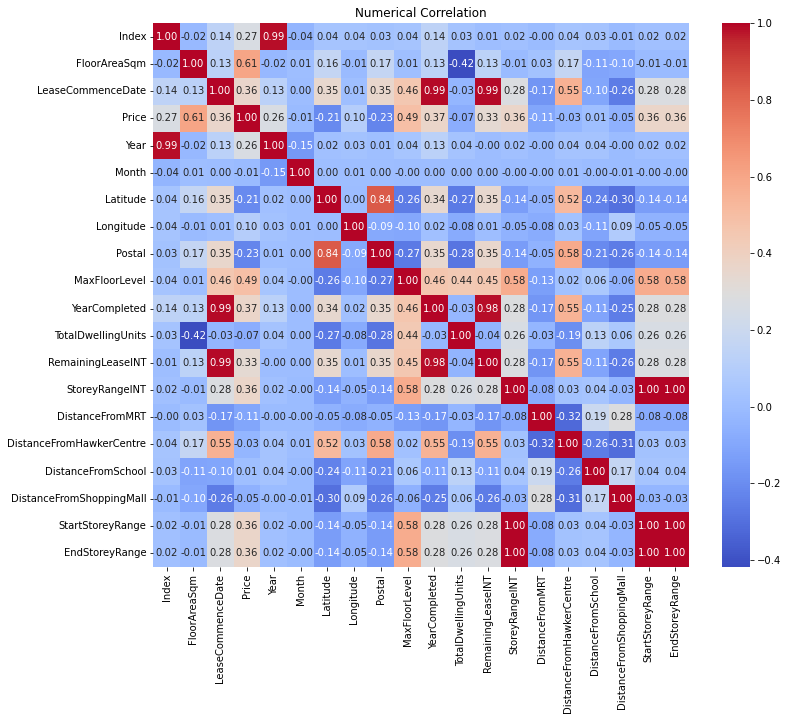

Correlation of all columns with respect to Price (descending order):
Price                       1.000000
FloorAreaSqm                0.606781
MaxFloorLevel               0.490787
YearCompleted               0.365937
EndStoreyRange              0.364385
StoreyRangeINT              0.364385
StartStoreyRange            0.364385
LeaseCommenceDate           0.362954
RemainingLeaseINT           0.330720
Index                       0.268744
Year                        0.264346
Longitude                   0.098163
DistanceFromSchool          0.010369
Month                      -0.011272
DistanceFromHawkerCentre   -0.033245
DistanceFromShoppingMall   -0.054090
TotalDwellingUnits         -0.070134
DistanceFromMRT            -0.105529
Latitude                   -0.209885
Postal                     -0.226111
Name: Price, dtype: float64


In [14]:
# correlation between numerical variables 
numerical_columns = df_final.select_dtypes(include=['float64', 'int64', 'int32']).columns
 
numerical_corr = df_final[numerical_columns].corr()
 
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Correlation')
plt.show()
 
price_corr = numerical_corr['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
 
print("Correlation of all columns with respect to Price (descending order):")
print(price_corr_sorted)

#### One-Hot encoding to transform categorical variables into numerical 

Variables to one-hot encode: Town, Flat-type, Flat-model
Reasons: From number of unique values seen for each variable, those 3 features have the least number of categories

##### One-hot encoding for FlatType

In [15]:
# One hot encoding for the column 'FlatType'
df_final_onehot = df_final
df_final_onehot = pd.get_dummies(df_final_onehot, columns=['FlatType'], prefix='FlatType')
print(df_final_onehot.columns)

Index(['Index', 'Town', 'Block', 'Street', 'StoreyRange', 'FloorAreaSqm',
       'FlatModel', 'LeaseCommenceDate', 'RemainingLease', 'Price', 'Year',
       'Month', 'Address', 'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel',
       'YearCompleted', 'MarketHawker', 'MultistoreyCarpark',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'NearestMRT', 'DistanceFromMRT', 'MRTDistribution',
       'NearestHawkerCentre', 'DistanceFromHawkerCentre',
       'HawkerCentreDistribution', 'NearestSchool', 'DistanceFromSchool',
       'SchoolDistribution', 'NearestShoppingMall', 'DistanceFromShoppingMall',
       'ShoppingMallDistribution', 'StartStoreyRange', 'EndStoreyRange',
       'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM',
       'FlatType_5 ROOM', 'FlatType_EXECUTIVE'],
      dtype='object')


##### One-hot encoding for FlatModel

In [16]:
# One hot encoding for the column 'FlatModel'
df_final_onehot = pd.get_dummies(df_final_onehot, columns=['FlatModel'], prefix='FlatModel')
print(df_final_onehot.columns)

Index(['Index', 'Town', 'Block', 'Street', 'StoreyRange', 'FloorAreaSqm',
       'LeaseCommenceDate', 'RemainingLease', 'Price', 'Year', 'Month',
       'Address', 'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel',
       'YearCompleted', 'MarketHawker', 'MultistoreyCarpark',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'NearestMRT', 'DistanceFromMRT', 'MRTDistribution',
       'NearestHawkerCentre', 'DistanceFromHawkerCentre',
       'HawkerCentreDistribution', 'NearestSchool', 'DistanceFromSchool',
       'SchoolDistribution', 'NearestShoppingMall', 'DistanceFromShoppingMall',
       'ShoppingMallDistribution', 'StartStoreyRange', 'EndStoreyRange',
       'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM',
       'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 'FlatModel_2-room',
       'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS',
       'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
       'FlatModel_Maisonette', 'FlatModel

##### One-hot encoding for Town

In [17]:
# One hot encoding for the column 'Town'
df_final_onehot = pd.get_dummies(df_final_onehot, columns=['Town'], prefix='Town')
print(df_final_onehot.columns)

Index(['Index', 'Block', 'Street', 'StoreyRange', 'FloorAreaSqm',
       'LeaseCommenceDate', 'RemainingLease', 'Price', 'Year', 'Month',
       'Address', 'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel',
       'YearCompleted', 'MarketHawker', 'MultistoreyCarpark',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'NearestMRT', 'DistanceFromMRT', 'MRTDistribution',
       'NearestHawkerCentre', 'DistanceFromHawkerCentre',
       'HawkerCentreDistribution', 'NearestSchool', 'DistanceFromSchool',
       'SchoolDistribution', 'NearestShoppingMall', 'DistanceFromShoppingMall',
       'ShoppingMallDistribution', 'StartStoreyRange', 'EndStoreyRange',
       'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM',
       'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 'FlatModel_2-room',
       'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS',
       'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
       'FlatModel_Maisonette', 'FlatModel_Model A

In [18]:
# variables to be converted from bool to int
bool_variables = [
    'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 
    'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS', 
    'FlatModel_Improved', 'FlatModel_Improved-Maisonette', 'FlatModel_Maisonette', 'FlatModel_Model A', 
    'FlatModel_Model A-Maisonette', 'FlatModel_Model A2', 'FlatModel_New Generation', 
    'FlatModel_Premium Apartment', 'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette', 
    'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace', 'FlatModel_Type S1', 
    'FlatModel_Type S2', 'Town_ANG MO KIO', 'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 
    'Town_BUKIT MERAH', 'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA', 
    'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG', 'Town_JURONG EAST', 
    'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA', 'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL', 
    'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON', 'Town_TAMPINES', 
    'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN'
]

for var in bool_variables:
    df_final_onehot[var] = df_final_onehot[var].astype(int)

df_final_onehot.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 155347 entries, 0 to 155820
Data columns (total 85 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Index                             155347 non-null  int64  
 1   Block                             155347 non-null  object 
 2   Street                            155347 non-null  object 
 3   StoreyRange                       155347 non-null  object 
 4   FloorAreaSqm                      155347 non-null  float64
 5   LeaseCommenceDate                 155347 non-null  int64  
 6   RemainingLease                    155347 non-null  object 
 7   Price                             155347 non-null  float64
 8   Year                              155347 non-null  int64  
 9   Month                             155347 non-null  int64  
 10  Address                           155347 non-null  object 
 11  Latitude                          155347 non-null  f

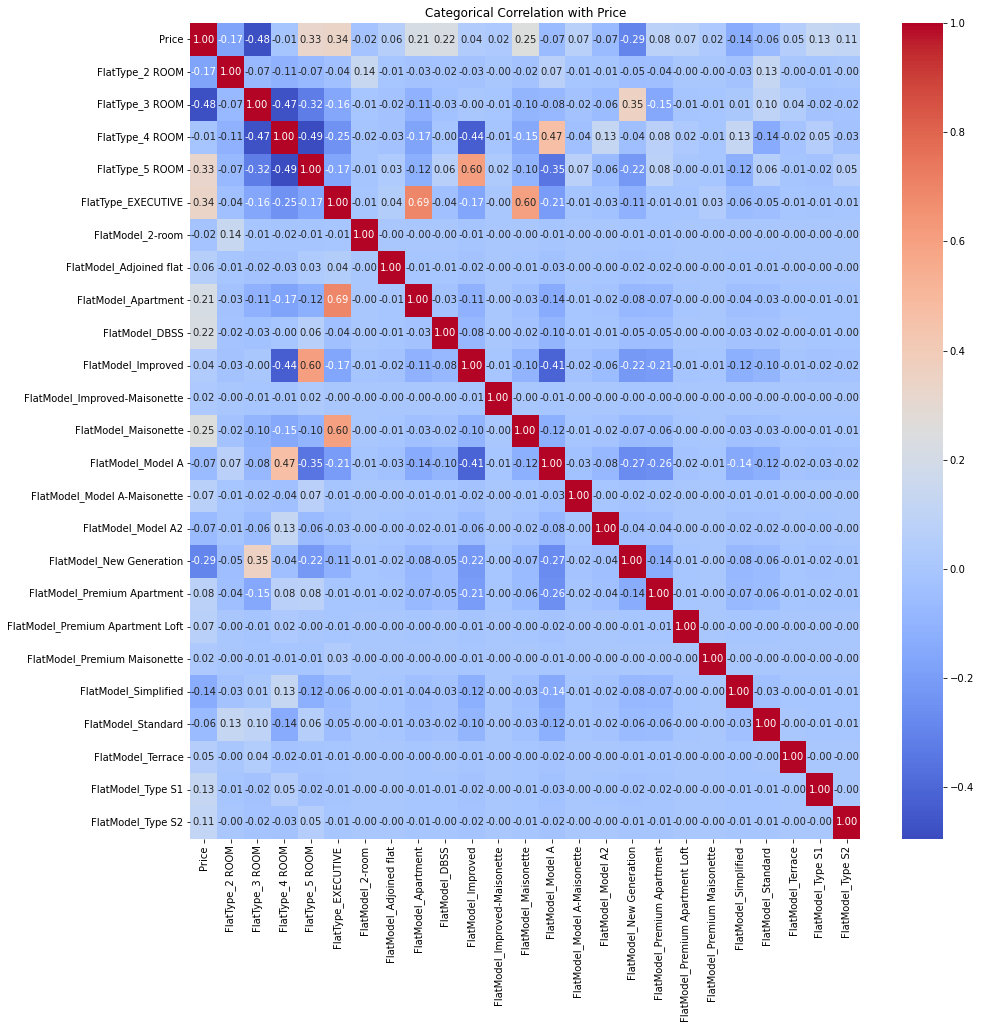

Correlation of all columns with respect to Price (descending order):
Price                               1.000000
FlatType_EXECUTIVE                  0.336320
FlatType_5 ROOM                     0.327673
FlatModel_Maisonette                0.251378
FlatModel_DBSS                      0.221369
FlatModel_Apartment                 0.213272
FlatModel_Type S1                   0.127393
FlatModel_Type S2                   0.114875
FlatModel_Premium Apartment         0.083341
FlatModel_Model A-Maisonette        0.068674
FlatModel_Premium Apartment Loft    0.068502
FlatModel_Adjoined flat             0.057209
FlatModel_Terrace                   0.053362
FlatModel_Improved                  0.035689
FlatModel_Premium Maisonette        0.016819
FlatModel_Improved-Maisonette       0.015626
FlatType_4 ROOM                    -0.013789
FlatModel_2-room                   -0.019871
FlatModel_Standard                 -0.064671
FlatModel_Model A                  -0.065095
FlatModel_Model A2             

In [19]:
# correlation between categorical variables (Flat Types and Flat Models)

columns_of_interest = ['FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 
                       'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS', 
                       'FlatModel_Improved', 'FlatModel_Improved-Maisonette', 'FlatModel_Maisonette', 'FlatModel_Model A', 
                       'FlatModel_Model A-Maisonette', 'FlatModel_Model A2', 'FlatModel_New Generation', 
                       'FlatModel_Premium Apartment', 'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette', 
                       'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace', 'FlatModel_Type S1', 
                       'FlatModel_Type S2']

subset_df = df_final_onehot[['Price'] + columns_of_interest]


numerical_corr = subset_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Correlation with Price')
plt.show()

price_corr = numerical_corr['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
print("Correlation of all columns with respect to Price (descending order):")
print(price_corr_sorted)


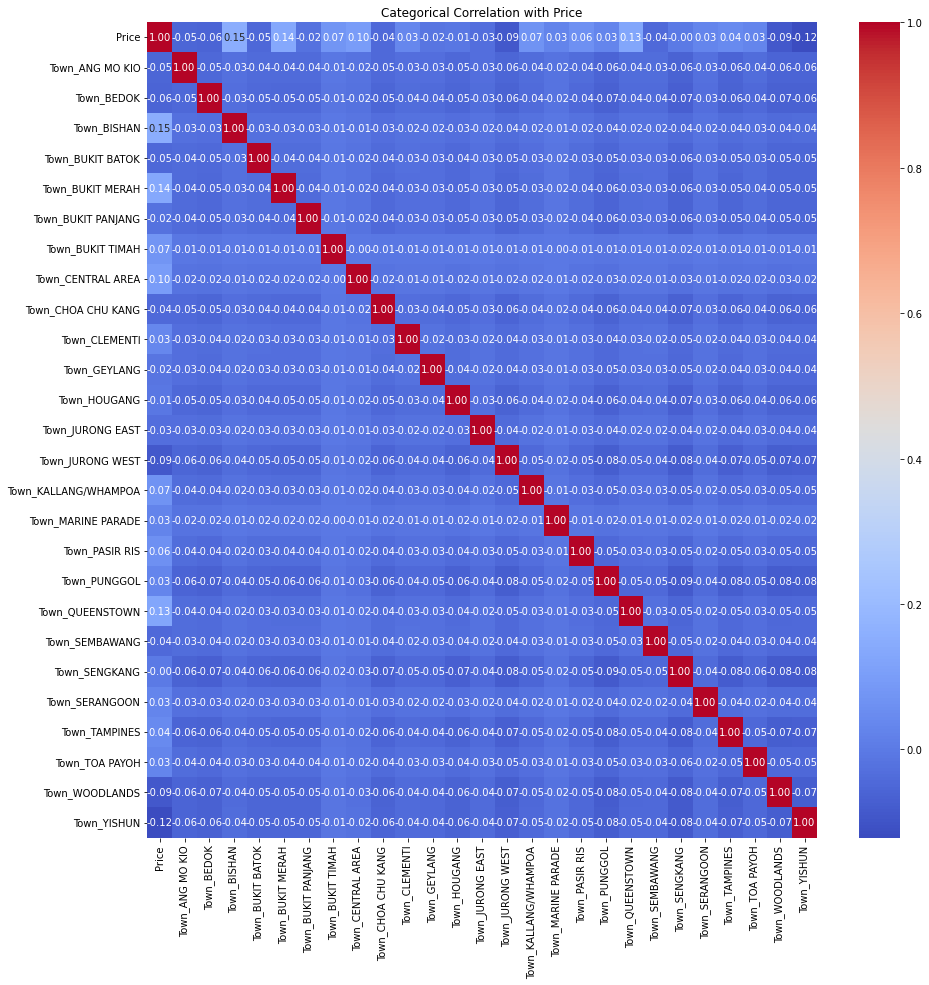

Correlation of all columns with respect to Price (descending order):
Price                   1.000000
Town_BISHAN             0.151266
Town_BUKIT MERAH        0.136751
Town_QUEENSTOWN         0.125285
Town_CENTRAL AREA       0.096471
Town_BUKIT TIMAH        0.072586
Town_KALLANG/WHAMPOA    0.070884
Town_PASIR RIS          0.061054
Town_TAMPINES           0.042688
Town_CLEMENTI           0.032479
Town_TOA PAYOH          0.031916
Town_SERANGOON          0.030848
Town_PUNGGOL            0.028505
Town_MARINE PARADE      0.026339
Town_SENGKANG          -0.002146
Town_HOUGANG           -0.007949
Town_GEYLANG           -0.016149
Town_BUKIT PANJANG     -0.023269
Town_JURONG EAST       -0.033500
Town_CHOA CHU KANG     -0.043340
Town_SEMBAWANG         -0.043930
Town_BUKIT BATOK       -0.048388
Town_ANG MO KIO        -0.052879
Town_BEDOK             -0.055943
Town_WOODLANDS         -0.086926
Town_JURONG WEST       -0.088722
Town_YISHUN            -0.121274
Name: Price, dtype: float64


In [20]:
# correlation between categorical variables (Towns)

columns_of_interest = ['Town_ANG MO KIO', 'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 
                       'Town_BUKIT MERAH', 'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA', 
                       'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG', 'Town_JURONG EAST', 
                       'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA', 'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL', 
                       'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON', 'Town_TAMPINES', 
                       'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN']

subset_df = df_final_onehot[['Price'] + columns_of_interest]


numerical_corr = subset_df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(numerical_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Correlation with Price')
plt.show()

price_corr = numerical_corr['Price']
price_corr_sorted = price_corr.sort_values(ascending=False)
print("Correlation of all columns with respect to Price (descending order):")
print(price_corr_sorted)


In [21]:
from sklearn.feature_selection import f_classif

target_variable = 'Price'

categorical_features = df_final_onehot[
    ['FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM', 'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 
    'FlatModel_2-room', 'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS', 
    'FlatModel_Improved', 'FlatModel_Improved-Maisonette', 'FlatModel_Maisonette', 'FlatModel_Model A', 
    'FlatModel_Model A-Maisonette', 'FlatModel_Model A2', 'FlatModel_New Generation', 
    'FlatModel_Premium Apartment', 'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette', 
    'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace', 'FlatModel_Type S1', 
    'FlatModel_Type S2', 'Town_ANG MO KIO', 'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 
    'Town_BUKIT MERAH', 'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA', 
    'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG', 'Town_JURONG EAST', 
    'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA', 'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL', 
    'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON', 'Town_TAMPINES', 
    'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN'
]]

f_scores, p_values = f_classif(categorical_features, df_final[target_variable])

anova_results = pd.DataFrame({'Feature': categorical_features.columns, 'F-score': f_scores, 'P-value': p_values})

anova_results.sort_values(by='F-score', ascending=True, inplace=True)

print("ANOVA test results for categorical features affecting Price:")
print(anova_results)


ANOVA test results for categorical features affecting Price:
                             Feature    F-score        P-value
5                   FlatModel_2-room   0.248098   1.000000e+00
10     FlatModel_Improved-Maisonette   0.332144   1.000000e+00
18      FlatModel_Premium Maisonette   0.519423   1.000000e+00
36                  Town_JURONG EAST   0.905378   9.999741e-01
35                      Town_HOUGANG   0.936158   9.965089e-01
45                    Town_SERANGOON   1.022802   1.722479e-01
29                Town_BUKIT PANJANG   1.115198   2.057235e-06
43                    Town_SEMBAWANG   1.179154   1.107694e-12
32                Town_CHOA CHU KANG   1.202076   1.859166e-15
46                     Town_TAMPINES   1.262911   4.488737e-24
48                    Town_WOODLANDS   1.282310   3.483366e-27
6            FlatModel_Adjoined flat   1.344836   2.572313e-38
14                FlatModel_Model A2   1.345189   2.202338e-38
27                  Town_BUKIT BATOK   1.353591   5.28307

Understand the F-statistics

Larger F-value: A larger F-value indicates a greater difference among the group means. It suggests that the variations between the groups are significant.
Smaller F-value: Conversely, a smaller F-value suggests that the group means are similar, and there may not be significant differences among them.

Examine the P-Value


P-Value < Significance Level (e.g., 0.05): If the p-value is less than your chosen significance level (often set at 0.05), it indicates that there are statistically significant differences among the groups. In other words, you have evidence to reject the null hypothesis, which assumes no significant differences.
P-Value ≥ Significance Level: If the p-value is equal to or greater than the chosen significance level, you do not have enough evidence to reject the null hypothesis. This suggests that any observed differences are likely due to random chance.

https://surveysparrow.com/blog/anova/

#### Standardization / Feature scaling :

Preprocessing step that involves transforming the data such that it has a mean of 0 and a standard deviation of 1. Ensures all the input features contribute proportionately.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define the input and target features :

X = df_final_onehot[['FloorAreaSqm', 'LeaseCommenceDate',
       'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel', 'YearCompleted',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'DistanceFromMRT', 'DistanceFromHawkerCentre', 'DistanceFromSchool',
       'DistanceFromShoppingMall', 'StartStoreyRange', 'EndStoreyRange',
       'FlatType_2 ROOM', 'FlatType_3 ROOM', 'FlatType_4 ROOM',
       'FlatType_5 ROOM', 'FlatType_EXECUTIVE', 'FlatModel_2-room',
       'FlatModel_Adjoined flat', 'FlatModel_Apartment', 'FlatModel_DBSS',
       'FlatModel_Improved', 'FlatModel_Improved-Maisonette',
       'FlatModel_Maisonette', 'FlatModel_Model A',
       'FlatModel_Model A-Maisonette', 'FlatModel_Model A2',
       'FlatModel_New Generation', 'FlatModel_Premium Apartment',
       'FlatModel_Premium Apartment Loft', 'FlatModel_Premium Maisonette',
       'FlatModel_Simplified', 'FlatModel_Standard', 'FlatModel_Terrace',
       'FlatModel_Type S1', 'FlatModel_Type S2', 'Town_ANG MO KIO',
       'Town_BEDOK', 'Town_BISHAN', 'Town_BUKIT BATOK', 'Town_BUKIT MERAH',
       'Town_BUKIT PANJANG', 'Town_BUKIT TIMAH', 'Town_CENTRAL AREA',
       'Town_CHOA CHU KANG', 'Town_CLEMENTI', 'Town_GEYLANG', 'Town_HOUGANG',
       'Town_JURONG EAST', 'Town_JURONG WEST', 'Town_KALLANG/WHAMPOA',
       'Town_MARINE PARADE', 'Town_PASIR RIS', 'Town_PUNGGOL',
       'Town_QUEENSTOWN', 'Town_SEMBAWANG', 'Town_SENGKANG', 'Town_SERANGOON',
       'Town_TAMPINES', 'Town_TOA PAYOH', 'Town_WOODLANDS', 'Town_YISHUN']]

y = df_final_onehot['Price']


# Perform train-test split
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)


# Standardizing data
scaler = StandardScaler()
scaler.fit(X_train_original)
X_train = scaler.transform(X_train_original)
print(len(X_train))
X_test = scaler.transform(X_test_original)



108742


108742
Training ARIMA model...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model training completed.
Making predictions...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Predictions made.
Test RMSE: 60986.603


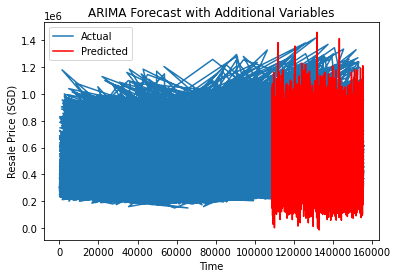

In [23]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt



# Extract exogenous variables for training and testing
exog_train = X_train
exog_test = X_test
print(len(exog_train))
print("Training ARIMA model...")
model = ARIMA(y_train, exog=exog_train, order=(1, 1, 0))
model_fit = model.fit() 

print("ARIMA model training completed.")

# Make predictions
print("Making predictions...")
forecast = model_fit.forecast(steps=len(y_test), exog=exog_test)
print("Predictions made.")

# Evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecasts against actual outcomes
pyplot.plot(y_test, label='Actual')
pyplot.plot(forecast, color='red', label='Predicted')
pyplot.title('ARIMA Forecast with Additional Variables')
pyplot.xlabel('Time')
pyplot.ylabel('Resale Price (SGD)')
pyplot.legend()
pyplot.show()

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155347 entries, 0 to 155820
Data columns (total 38 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     155347 non-null  int64  
 1   Town                      155347 non-null  object 
 2   FlatType                  155347 non-null  object 
 3   Block                     155347 non-null  object 
 4   Street                    155347 non-null  object 
 5   StoreyRange               155347 non-null  object 
 6   FloorAreaSqm              155347 non-null  float64
 7   FlatModel                 155347 non-null  object 
 8   LeaseCommenceDate         155347 non-null  int64  
 9   RemainingLease            155347 non-null  object 
 10  Price                     155347 non-null  float64
 11  Year                      155347 non-null  int64  
 12  Month                     155347 non-null  int64  
 13  Address                   155347 non-null  o

### Using Label encoding for categorical Variables

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder_town = LabelEncoder()
label_encoder_flat_type = LabelEncoder()
label_encoder_flat_model = LabelEncoder()
# Fit and transform label encoding for 'town'
df_final['encoded_town'] = label_encoder_town.fit_transform(df_final['Town'])

# Fit and transform label encoding for 'public_housing_flat_type'
df_final['encoded_flat_type'] = label_encoder_flat_type.fit_transform(df_final['FlatType'])

# Fit and transform label encoding for 'flat_model'
df_final['encoded_flat_model'] = label_encoder_flat_model.fit_transform(df_final['FlatModel'])


# Dictionary for 'town' encoding
town_encoding_dict = dict(zip(label_encoder_town.classes_, label_encoder_town.transform(label_encoder_town.classes_)))

# Dictionary for 'public_housing_flat_type' encoding
flat_type_encoding_dict = dict(zip(label_encoder_flat_type.classes_, label_encoder_flat_type.transform(label_encoder_flat_type.classes_)))

# Dictionary for 'flat_model' encoding
flat_model_encoding_dict = dict(zip(label_encoder_flat_model.classes_, label_encoder_flat_model.transform(label_encoder_flat_model.classes_)))

# Print the encoding dictionaries
print("Encoding dictionary for 'Town':", town_encoding_dict)
print("Encoding dictionary for 'FlatType':", flat_type_encoding_dict)
print("Encoding dictionary for 'FlatModel':", flat_model_encoding_dict)
# Dropping the pre-encoded columns
df_final.drop(['Town', 'FlatType', 'FlatModel'], axis=1, inplace=True)

# Print the encoded values
print("Encoded 'town' values:", df_final['encoded_town'])
print("Encoded 'public_housing_flat_type' values:", df_final['encoded_flat_type'])
print("Encoded 'Flat_model' values:", df_final['encoded_flat_model'])

# To decode the encoded values back to original labels
decoded_town = label_encoder_town.inverse_transform(df_final['encoded_town'])
decoded_flat_type = label_encoder_flat_type.inverse_transform(df_final['encoded_flat_type'])

# Print the decoded values
print("Decoded 'town' values:", decoded_town)
print("Decoded 'public_housing_flat_type' values:", decoded_flat_type)




Encoding dictionary for 'Town': {'ANG MO KIO': 0, 'BEDOK': 1, 'BISHAN': 2, 'BUKIT BATOK': 3, 'BUKIT MERAH': 4, 'BUKIT PANJANG': 5, 'BUKIT TIMAH': 6, 'CENTRAL AREA': 7, 'CHOA CHU KANG': 8, 'CLEMENTI': 9, 'GEYLANG': 10, 'HOUGANG': 11, 'JURONG EAST': 12, 'JURONG WEST': 13, 'KALLANG/WHAMPOA': 14, 'MARINE PARADE': 15, 'PASIR RIS': 16, 'PUNGGOL': 17, 'QUEENSTOWN': 18, 'SEMBAWANG': 19, 'SENGKANG': 20, 'SERANGOON': 21, 'TAMPINES': 22, 'TOA PAYOH': 23, 'WOODLANDS': 24, 'YISHUN': 25}
Encoding dictionary for 'FlatType': {'2 ROOM': 0, '3 ROOM': 1, '4 ROOM': 2, '5 ROOM': 3, 'EXECUTIVE': 4}
Encoding dictionary for 'FlatModel': {'2-room': 0, 'Adjoined flat': 1, 'Apartment': 2, 'DBSS': 3, 'Improved': 4, 'Improved-Maisonette': 5, 'Maisonette': 6, 'Model A': 7, 'Model A-Maisonette': 8, 'Model A2': 9, 'New Generation': 10, 'Premium Apartment': 11, 'Premium Apartment Loft': 12, 'Premium Maisonette': 13, 'Simplified': 14, 'Standard': 15, 'Terrace': 16, 'Type S1': 17, 'Type S2': 18}
Encoded 'town' values: 0

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Convert 'Year' and 'Month' to strings and concatenate them
df_final['Year'] = df_final['Year'].astype(str)
df_final['Month'] = df_final['Month'].astype(str)
df_final['Date'] = df_final['Year'] + '-' + df_final['Month']


df_final.drop(columns=['Year', 'Month'], inplace=True)


# Check the result
print(df_final.head())

df_final = df_final.dropna(subset=['Date'])
# Split the dataset into train and test sets
size = int(len(df_final) * 0.7)  
train, test = df_final[:size], df_final[size:]


train_sorted = train.sort_values(by='Date')
test_sorted = test.sort_values(by='Date')


   Index Block             Street StoreyRange  FloorAreaSqm  \
0      0   406  ANG MO KIO AVE 10    10 TO 12          44.0   
1      1   108   ANG MO KIO AVE 4    01 TO 03          67.0   
2      2   602   ANG MO KIO AVE 5    01 TO 03          67.0   
3      3   465  ANG MO KIO AVE 10    04 TO 06          68.0   
4      4   601   ANG MO KIO AVE 5    01 TO 03          67.0   

   LeaseCommenceDate      RemainingLease     Price                Address  \
0               1979  61 years 04 months  232000.0  406 ANG MO KIO AVE 10   
1               1978  60 years 07 months  250000.0   108 ANG MO KIO AVE 4   
2               1980  62 years 05 months  262000.0   602 ANG MO KIO AVE 5   
3               1980   62 years 01 month  265000.0  465 ANG MO KIO AVE 10   
4               1980  62 years 05 months  265000.0   601 ANG MO KIO AVE 5   

   Latitude  ...  SchoolDistribution            NearestShoppingMall  \
0  1.362005  ...          within-1km                        AMK Hub   
1  1.370966  ...

108742
Training ARIMA model...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model training completed.
Making predictions...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Predictions made.
Test RMSE: 106651.753


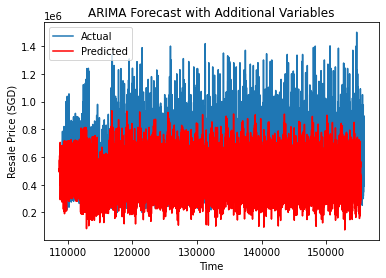

In [27]:
import pandas as pd
from category_encoders import TargetEncoder
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train = train[['FloorAreaSqm', 'LeaseCommenceDate',
       'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel', 'YearCompleted',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'DistanceFromMRT', 'DistanceFromHawkerCentre', 'DistanceFromSchool',
       'DistanceFromShoppingMall','encoded_flat_model','encoded_flat_type','encoded_flat_model']]
X_test = test[['FloorAreaSqm', 'LeaseCommenceDate',
       'Latitude', 'Longitude', 'Postal', 'MaxFloorLevel', 'YearCompleted',
       'TotalDwellingUnits', 'RemainingLeaseINT', 'StoreyRangeINT',
       'DistanceFromMRT', 'DistanceFromHawkerCentre', 'DistanceFromSchool',
       'DistanceFromShoppingMall','encoded_flat_model','encoded_flat_type','encoded_flat_model']]
# Extract exogenous variables for training and testing
exog_train = X_train
exog_test = X_test
y_train = train['Price']
y_test = test['Price']
print(len(exog_train))
# Train ARIMA model with additional variables
print("Training ARIMA model...")
model = ARIMA(y_train, exog=exog_train, order=(1, 1, 0))
model_fit = model.fit()  

print("ARIMA model training completed.")

# Make predictions
print("Making predictions...")
forecast = model_fit.forecast(steps=len(y_test), exog=exog_test)
print("Predictions made.")

# Evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecasts against actual outcomes
pyplot.plot(y_test, label='Actual')
pyplot.plot(forecast, color='red', label='Predicted')
pyplot.title('ARIMA Forecast with Additional Variables')
pyplot.xlabel('Time')
pyplot.ylabel('Resale Price (SGD)')
pyplot.legend()
pyplot.show()

### Training with only Categorical Variables as the Exogenous inputs 

108742
Training ARIMA model...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA model training completed.
Making predictions...


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Predictions made.
Test RMSE: 134741.708


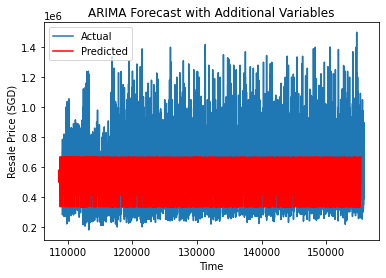

In [28]:
X_train = train[['encoded_flat_model','encoded_flat_type','encoded_flat_model']]
X_test = test[['encoded_flat_model','encoded_flat_type','encoded_flat_model']]
# Extract exogenous variables for training and testing
exog_train = X_train
exog_test = X_test
y_train = train['Price']
y_test = test['Price']
print(len(exog_train))
# Train ARIMA model with additional variables
print("Training ARIMA model...")
model = ARIMA(y_train, exog=exog_train, order=(1, 1, 0))
model_fit = model.fit()  

print("ARIMA model training completed.")

# Make predictions
print("Making predictions...")
forecast = model_fit.forecast(steps=len(y_test), exog=exog_test)
print("Predictions made.")

# Evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecasts against actual outcomes
pyplot.plot(y_test, label='Actual')
pyplot.plot(forecast, color='red', label='Predicted')
pyplot.title('ARIMA Forecast with Additional Variables')
pyplot.xlabel('Time')
pyplot.ylabel('Resale Price (SGD)')
pyplot.legend()
pyplot.show()